## **Multi Class Classification with K-Nearest Neigbors**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
from sklearn.datasets import load_wine

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# model
from sklearn.neighbors import KNeighborsClassifier

# metrics for multi class classifications
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# 
import warnings
warnings.filterwarnings("ignore")

In [22]:
# load dataset
data = load_wine()
print(data["DESCR"])


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [23]:
# split Feature (X) and Target class (y)
X, y = data["data"], data["target"]



# print class (y) to get know how many classes in this dataset
print(f"Total Unique Class pada dataset:s {np.unique(y)}")

X.shape, y.shape

Total Unique Class pada dataset:s [0 1 2]


((178, 13), (178,))

In [24]:
# split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [25]:
# standardize data
SK = StandardScaler()

X_train_scaled = SK.fit_transform(X_train, y)
X_test_scaled = SK.transform(X_test)

In [26]:
# train model

Knn = KNeighborsClassifier()

Knn.fit(X_train_scaled, y_train)


print(Knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [27]:
# evalutaion Model

y_pred = Knn.predict(X_test_scaled)
y_proba = Knn.predict_proba(X_test_scaled)


# metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
clf_report = classification_report(y_test, y_pred)

print(f"accuracy score Model: {acc}")
print(f"F1 score Model: {acc}")
print(clf_report)

accuracy score Model: 0.9444444444444444
F1 score Model: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



Plot Confusion Matrix 

Total Data using in predict model: 36 data


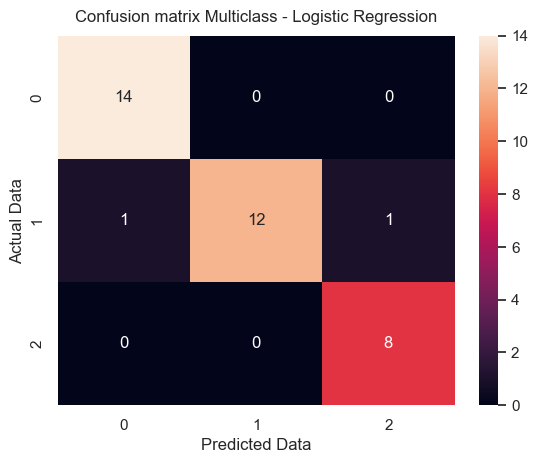

In [28]:
sns.set()

c_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(data=c_matrix, annot=True)
plt.title(f"Confusion matrix Multiclass - KNN", pad=10, fontsize=12)
plt.ylabel("Actual Data")
plt.xlabel("Predicted Data")

print(f"Total Data using in predict model: {X_test_scaled.shape[0]} data")

**Plot ROC & AUC**

Untuk Plot ROC dan AUC Multiclass kita wajib melakuakan Label Binarizer terlebih dahulu, karena untuk roc_curve dia hanya bisa digunakan untuk Binary classification jadi, dengan melaukan hal tersebut akan membuat dari yang awalnya multiclass (lebih dari 2 class) menjadi versi yang bisa dibaca oleh roc_curve atau OVA (One Vs All)

**Note**: Label Binarizer ini akan melakukan convert semua nilai dari y_test yang sebelumnya ada 3 class (0,1,2) menjadi bentuk One Hot Encoding yang mana valuenya akan menjadi antara 1 (True) dan 0 (False)

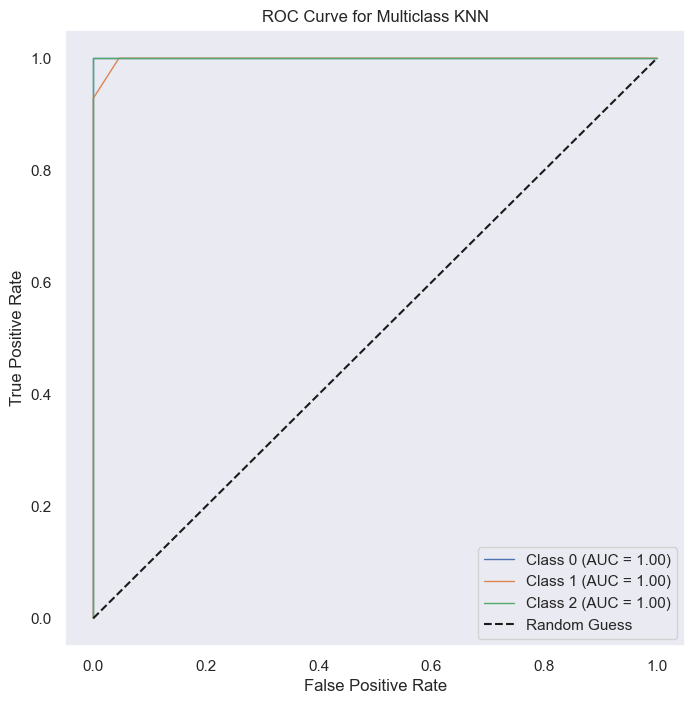

Overall AUC (OvR): 1.00
Overall AUC (OvO): 1.00


In [30]:
# Binarize labels y_test
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})", linewidth=1)

# Plot random guess line
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

# 8. Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Calculate overall AUC
roc_auc_ovr = roc_auc_score(y_test_binarized, y_proba, multi_class="ovr")
roc_auc_ovo = roc_auc_score(y_test_binarized, y_proba, multi_class="ovo")
print(f"Overall AUC (OvR): {roc_auc_ovr:.2f}")
print(f"Overall AUC (OvO): {roc_auc_ovo:.2f}")